### Train MLP on Circuit Elements

##### Load Training Data

In [6]:
# %matplotlib notebook

In [7]:
import pickle

# LOAD DATA FROM FILES
with open("../Training_Data/filter_dataset_1.pkl", "rb") as f:
    loaded_training_data = pickle.load(f)

with open("../Training_Data/filter_dataset_2.pkl", "rb") as f:
    loaded_validation_data = pickle.load(f)

with open("../Training_Data/filter_dataset_3.pkl", "rb") as f:
    loaded_testing_data = pickle.load(f)

##### Create Data Loaders

In [8]:
import sys
import importlib
sys.path.append('../ML_utils/')
import ML_funcs as ML # type: ignore
importlib.reload(ML)


# Training Dataloader
S21 = loaded_training_data["S21_dB_clean"]
filt = loaded_training_data["filters_clean"]
tr_dl = ML.create_dataloader(s21_data=S21, filter_param=filt, batch_size=128, shuffle=True)

# Evaluation Dataloader
S21 = loaded_validation_data["S21_dB_clean"]
filt = loaded_validation_data["filters_clean"]
va_dl = ML.create_dataloader(s21_data=S21, filter_param=filt, batch_size=128, shuffle=True)

# Testing Dataloader
S21 = loaded_testing_data["S21_dB_clean"]
filt = loaded_testing_data["filters_clean"]
te_dl = ML.create_dataloader(s21_data=S21, filter_param=filt, batch_size=128, shuffle=True)

del S21, filt

##### Implement Model

In [9]:
import torch
import torch.nn as nn


import sys
import importlib
sys.path.append('../ML_utils/')
import ML_funcs as ML # type: ignore
importlib.reload(ML)




# device = "cpu"
device = "cuda"
criterion = ML.MSPELoss()


# Define Model
MLP_1 = ML.MLP_v1(  in_dim = 1000,
                    hidden_dims = (512, 256, 128),
                    out_dim = 10,
                    act = nn.ReLU(),
                    drop_prob = 0.2     )



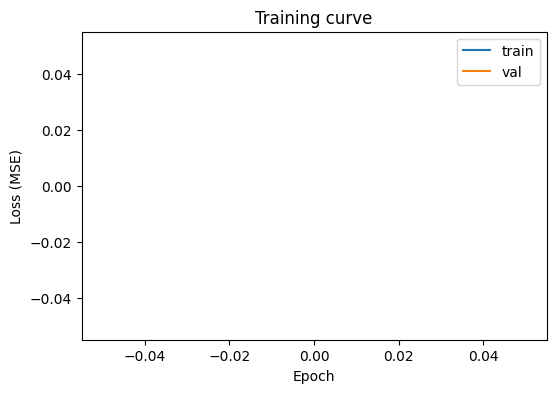

Epoch   1 | train 2164632248778.751953 | val 63261950705.664001
Epoch   2 | train 100391137640.447998 | val 6434533629.952000
Epoch   3 | train 18091854749.695999 | val 1452551434.240000
Epoch   4 | train 5301472090.112000 | val 1445507870.720000
Epoch   5 | train 1682375766.016000 | val 1134377057.280000
Epoch   6 | train 1174371358.208000 | val 970698813.440000
Epoch   7 | train 1130936056.832000 | val 728645203.968000
Epoch   8 | train 864631378.944000 | val 615265843.200000
Epoch   9 | train 740888146.432000 | val 453198586.624000
Epoch  10 | train 937565115.392000 | val 385587273.984000
Epoch  11 | train 625758182.656000 | val 362441307.392000
Epoch  12 | train 580276182.016000 | val 270700352.000000
Epoch  13 | train 511425022.976000 | val 198879414.784000
Epoch  14 | train 436642278.144000 | val 145973545.920000
Epoch  15 | train 358129069.568000 | val 65075700.992000
Epoch  16 | train 264569062.144000 | val 26088201.696000
Epoch  17 | train 316315679.360000 | val 47505428.28800

In [13]:

# Train Model
MLP_1, hist_train, hist_val = ML.train_model( tr_dl, va_dl,
                        criterion = criterion,
                        batch_size = 128,
                        lr = 1e-3,
                        weight_decay = 1e-4,
                        num_epochs = 1200,
                        drop_prob = 0.05,
                        device = device,
                        plotting=False)



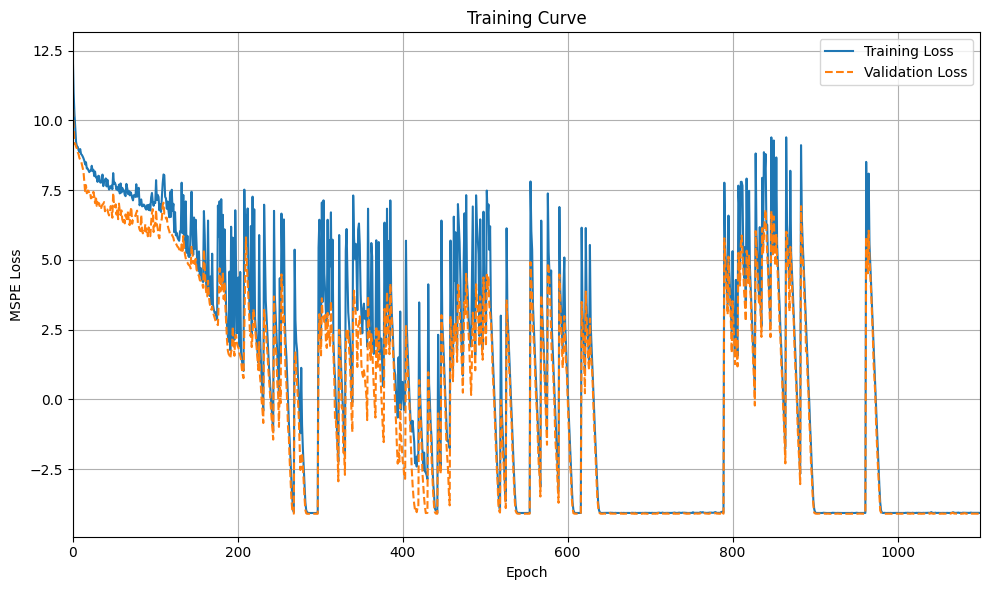

In [17]:
import numpy as np
import matplotlib.pyplot as plt


# hist_train = [2, 3, 4]
# hist_val = [2, 3, 4]


hist_train_log = np.log10(hist_train)
hist_val_log = np.log10(hist_val)


# Plot
plt.figure(figsize=(10, 6))
plt.plot(hist_train_log, label='Training Loss')
plt.plot(hist_val_log, label='Validation Loss', linestyle='--')

plt.title('Training Curve')
plt.xlabel('Epoch')
plt.ylabel('MSPE Loss')
plt.xlim(0,1100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




In [1]:
# Create figure and a single axes
fig_mse, (ax_log_mse, ax_mse) = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), sharex=True)




train_loss_lin = hist_train
val_loss_gt_lin = hist_val


train_loss_log = np.log10( train_loss_lin )
val_loss_gt_log = np.log10( val_loss_gt_lin )


# ------------------
# Log Axes
ax_log_mse.plot( train_loss_log, label="Train Loss", color='blue', linestyle='--')
ax_log_mse.plot( val_loss_gt_log, label="Validation Loss", color='purple', linestyle='--')

ax_log_mse.set_xlabel("Epoch")
ax_log_mse.set_ylabel("log10( MSPE )")
ax_log_mse.set_title("ML Based 5th Order BandPass Filter Designer")
ax_log_mse.grid(True)
ax_log_mse.legend()

# ------------------
# Linear Axes
ax_mse.plot( train_loss_lin, label="Train Loss", color='blue', linestyle='--')
ax_mse.plot(  val_loss_gt_lin, label="Validation Loss", color='purple', linestyle='--')


ax_mse.set_ylim(0,1)
ax_mse.set_xlim(0,1100)
ax_mse.set_xlabel("Epoch")
ax_mse.set_ylabel("MSPE (%)")
ax_mse.grid(True)
ax_mse.legend()





# Show plot
plt.show()



NameError: name 'plt' is not defined